In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
df = pd.read_excel('Book1.xlsx')

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.sort_values('date')

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['power_factor'] = df['units'] / df['KVAH']

In [ ]:
print("Dataset shape after preprocessing:", df.shape)
print("\nFirst few rows of preprocessed data:")
print(df.head())
print("\nBasic statistics of numerical columns:")
print(df.describe())
print("\nMissing values by column after preprocessing:")
print(df.isnull().sum())

Dataset shape after preprocessing: (519, 8)

First few rows of preprocessed data:
        date     units      KVAH  year  month  day  day_of_week  power_factor
0 2022-10-06  12583.57  12767.12  2022     10    6            3      0.985623
1 2022-10-07  12590.03  12773.39  2022     10    7            4      0.985645
2 2022-10-08  12597.36  12780.94  2022     10    8            5      0.985636
3 2022-10-09  12605.07  12788.67  2022     10    9            6      0.985644
4 2022-10-10  12612.53  12796.14  2022     10   10            0      0.985651

Basic statistics of numerical columns:
                                date          units          KVAH  \
count                            519     519.000000    519.000000   
mean   2023-12-03 17:03:48.901733888   19206.137784  18782.185079   
min              2022-10-06 00:00:00   12483.380000  12767.120000   
25%              2023-09-05 12:00:00   17476.875000  17712.080000   
50%              2024-01-13 00:00:00   19223.890000  19491.940000

In [ ]:
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

In [ ]:
for column in ['units', 'KVAH']:
    # Modified line to unpack all three returned values
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    df[column + '_cleaned'] = df[column].clip(lower=lower_bound, upper=upper_bound)
    print(f"\nStatistics for {column}:")
    print("Original data statistics:")
    print(df[column].describe())
    print("Cleaned data statistics:")
    print(df[column + '_cleaned'].describe())


Statistics for units:
Original data statistics:
count       519.000000
mean      19206.137784
std       11460.858621
min       12483.380000
25%       17476.875000
50%       19223.890000
75%       20788.160000
max      203367.700000
Name: units, dtype: float64
Cleaned data statistics:
count      519.000000
mean     18545.897404
std       2956.443014
min      12509.947500
25%      17476.875000
50%      19223.890000
75%      20788.160000
max      25755.087500
Name: units_cleaned, dtype: float64

Statistics for KVAH:
Original data statistics:
count      519.000000
mean     18782.185079
std       2970.416189
min      12767.120000
25%      17712.080000
50%      19491.940000
75%      21070.820000
max      22826.620000
Name: KVAH, dtype: float64
Cleaned data statistics:
count      519.000000
mean     18782.185079
std       2970.416189
min      12767.120000
25%      17712.080000
50%      19491.940000
75%      21070.820000
max      22826.620000
Name: KVAH_cleaned, dtype: float64


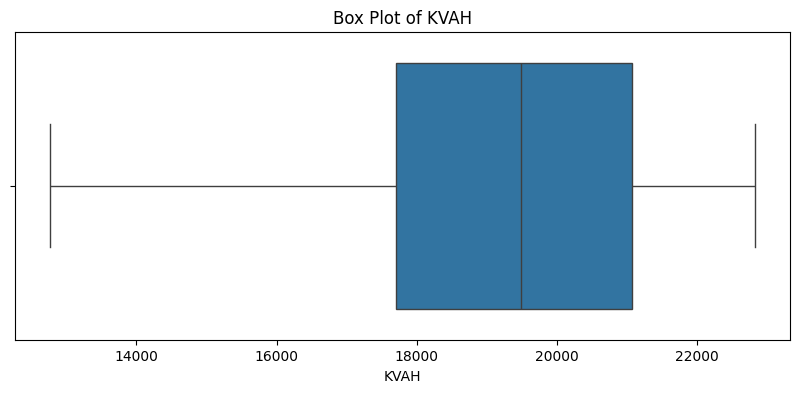

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df[column])
plt.title('Box Plot of ' + column)
plt.show()

In [ ]:
for column in ['units', 'KVAH']:
    _, lower_bound, upper_bound = detect_outliers(df, column)
    df[column + '_cleaned'] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
for column in ['units', 'KVAH']:
    print(f"\nStatistics for {column}:")
    print("Original data statistics:")
    print(df[column].describe())
    print("Cleaned data statistics:")
    print(df[column + '_cleaned'].describe())


Statistics for units:
Original data statistics:
count       519.000000
mean      19206.137784
std       11460.858621
min       12483.380000
25%       17476.875000
50%       19223.890000
75%       20788.160000
max      203367.700000
Name: units, dtype: float64
Cleaned data statistics:
count      519.000000
mean     18545.897404
std       2956.443014
min      12509.947500
25%      17476.875000
50%      19223.890000
75%      20788.160000
max      25755.087500
Name: units_cleaned, dtype: float64

Statistics for KVAH:
Original data statistics:
count      519.000000
mean     18782.185079
std       2970.416189
min      12767.120000
25%      17712.080000
50%      19491.940000
75%      21070.820000
max      22826.620000
Name: KVAH, dtype: float64
Cleaned data statistics:
count      519.000000
mean     18782.185079
std       2970.416189
min      12767.120000
25%      17712.080000
50%      19491.940000
75%      21070.820000
max      22826.620000
Name: KVAH_cleaned, dtype: float64


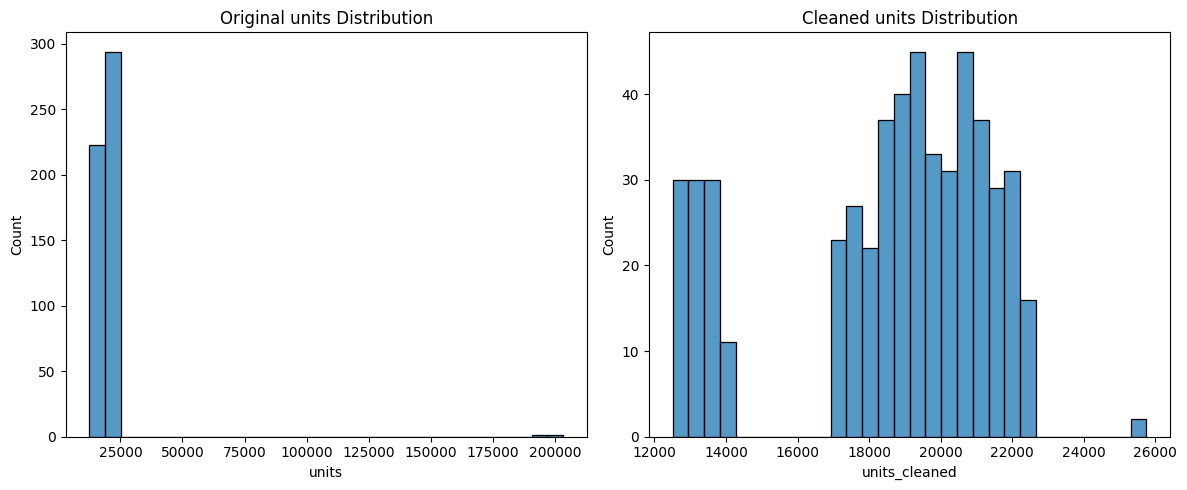

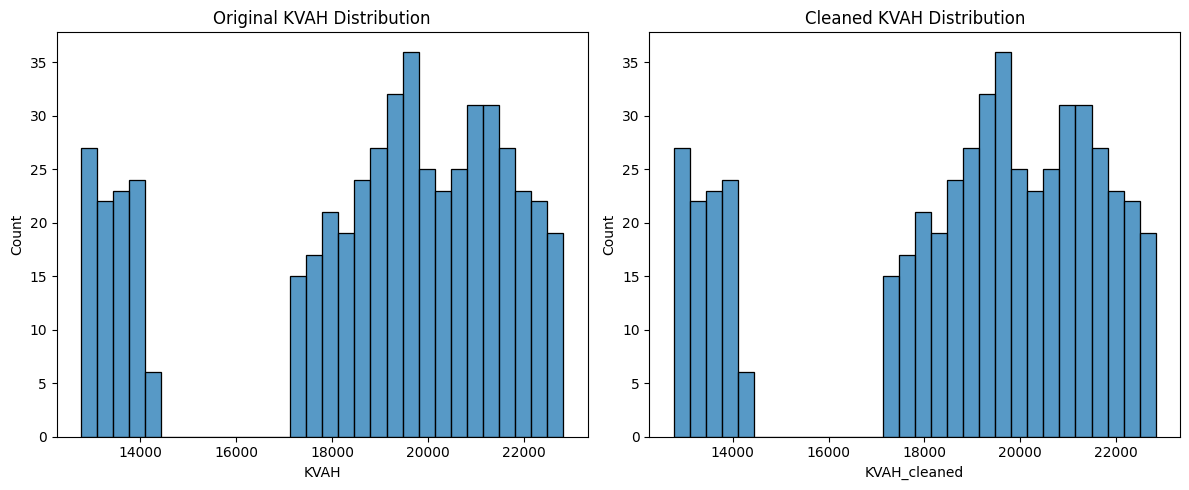


Outlier handling complete. New columns 'units_cleaned' and 'KVAH_cleaned' have been added to the dataframe.


In [ ]:
for column in ['units', 'KVAH']:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30)
    plt.title('Original ' + column + ' Distribution')

    plt.subplot(1, 2, 2)
    sns.histplot(df[column + '_cleaned'], bins=30)
    plt.title('Cleaned ' + column + ' Distribution')

    plt.tight_layout()
    plt.show()

print("\nOutlier handling complete. New columns 'units_cleaned' and 'KVAH_cleaned' have been added to the dataframe.")

In [ ]:
numerical_columns = ['units_cleaned', 'KVAH_cleaned', 'power_factor']

In [ ]:
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

In [ ]:
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])
print("\nFirst few rows of Min-Max Scaled Data:")
print(df_minmax_scaled.head())

print("\nFirst few rows of Standard Scaled Data:")
print(df_standard_scaled.head())


First few rows of Min-Max Scaled Data:
        date     units      KVAH  year  month  day  day_of_week  power_factor  \
0 2022-10-06  12583.57  12767.12  2022     10    6            3      0.007942   
1 2022-10-07  12590.03  12773.39  2022     10    7            4      0.007945   
2 2022-10-08  12597.36  12780.94  2022     10    8            5      0.007944   
3 2022-10-09  12605.07  12788.67  2022     10    9            6      0.007945   
4 2022-10-10  12612.53  12796.14  2022     10   10            0      0.007946   

   units_cleaned  KVAH_cleaned  
0       0.005558      0.000000  
1       0.006046      0.000623  
2       0.006600      0.001374  
3       0.007182      0.002142  
4       0.007745      0.002885  

First few rows of Standard Scaled Data:
        date     units      KVAH  year  month  day  day_of_week  power_factor  \
0 2022-10-06  12583.57  12767.12  2022     10    6            3     -0.063409   
1 2022-10-07  12590.03  12773.39  2022     10    7            4     -0.0

In [ ]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

print("Simple Split:")
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)
print("\
Training data date range:", train_data['date'].min(), "to", train_data['date'].max())
print("Testing data date range:", test_data['date'].min(), "to", test_data['date'].max())

Simple Split:
Training set shape: (415, 10)
Testing set shape: (104, 10)
Training data date range: 2022-10-06 00:00:00 to 2024-06-16 00:00:00
Testing data date range: 2024-06-17 00:00:00 to 2024-09-28 00:00:00


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
print("\
Time Series Cross-validation Splits:")
for i, (train_index, test_index) in enumerate(tscv.split(df)):
    print(f"\
Split {i+1}:")
    print(f"Training set size: {len(train_index)}, Testing set size: {len(test_index)}")
    print(f"Training data range: {df.iloc[train_index]['date'].min()} to {df.iloc[train_index]['date'].max()}")
    print(f"Testing data range: {df.iloc[test_index]['date'].min()} to {df.iloc[test_index]['date'].max()}")


Time Series Cross-validation Splits:
Split 1:
Training set size: 89, Testing set size: 86
Training data range: 2022-10-06 00:00:00 to 2023-01-02 00:00:00
Testing data range: 2023-01-03 00:00:00 to 2023-10-20 00:00:00
Split 2:
Training set size: 175, Testing set size: 86
Training data range: 2022-10-06 00:00:00 to 2023-10-20 00:00:00
Testing data range: 2023-10-21 00:00:00 to 2024-01-14 00:00:00
Split 3:
Training set size: 261, Testing set size: 86
Training data range: 2022-10-06 00:00:00 to 2024-01-14 00:00:00
Testing data range: 2024-01-15 00:00:00 to 2024-04-09 00:00:00
Split 4:
Training set size: 347, Testing set size: 86
Training data range: 2022-10-06 00:00:00 to 2024-04-09 00:00:00
Testing data range: 2024-04-10 00:00:00 to 2024-07-04 00:00:00
Split 5:
Training set size: 433, Testing set size: 86
Training data range: 2022-10-06 00:00:00 to 2024-07-04 00:00:00
Testing data range: 2024-07-05 00:00:00 to 2024-09-28 00:00:00


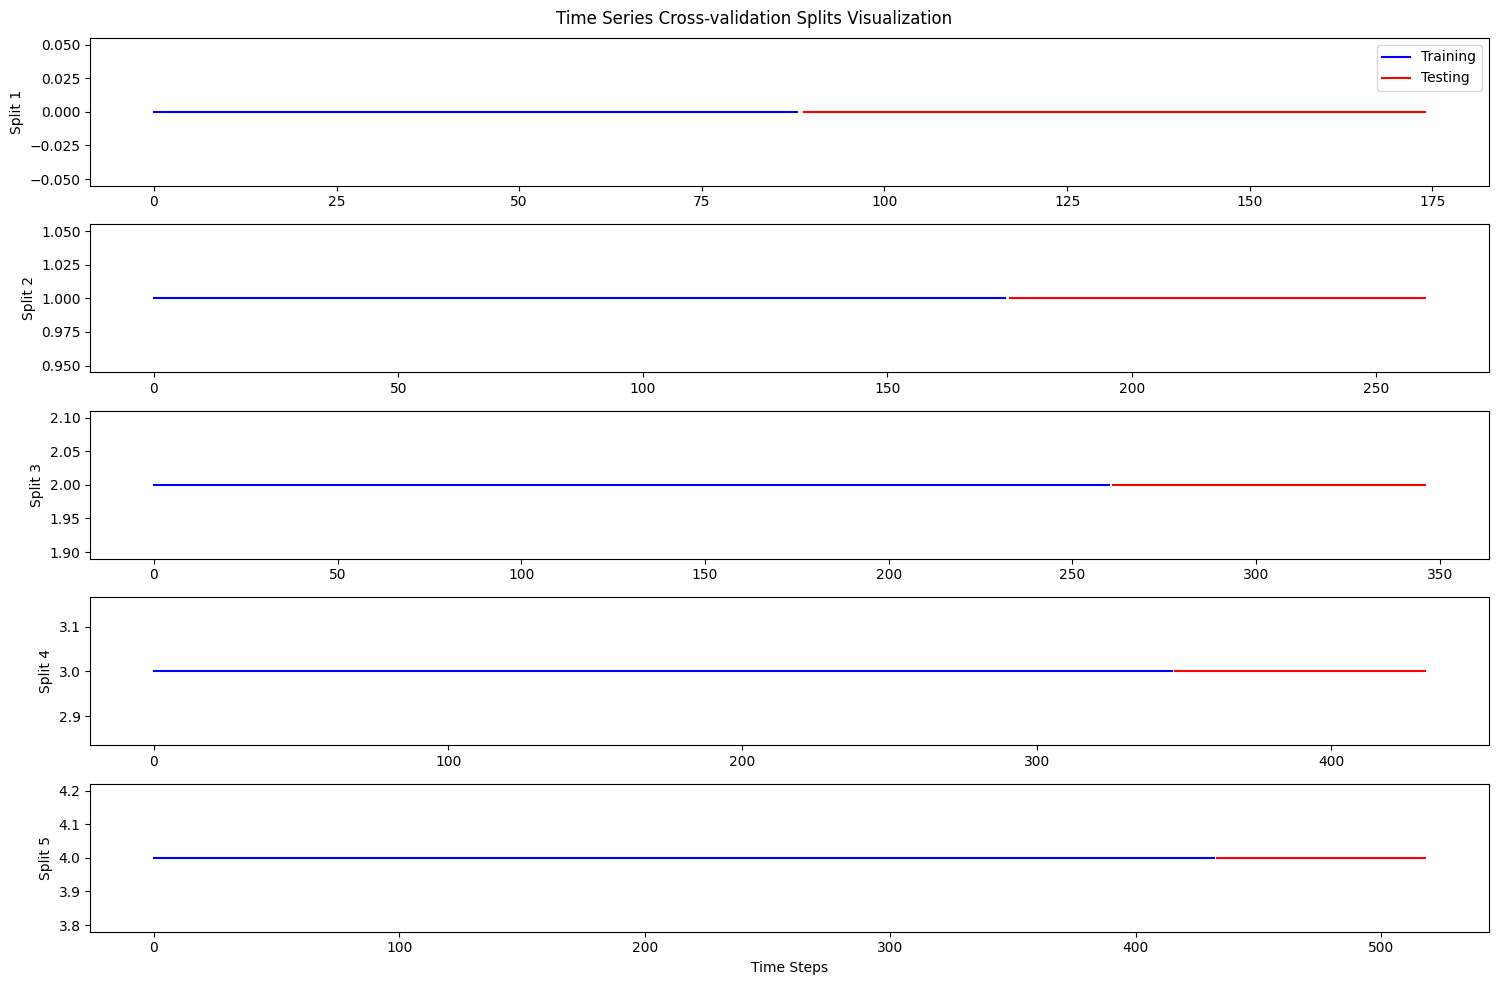

Split datasets have been saved as 'train_data.csv' and 'test_data.csv'


In [ ]:
plt.figure(figsize=(15, 10))
for i, (train_index, test_index) in enumerate(tscv.split(df)):
    plt.subplot(5, 1, i+1)
    plt.plot(range(len(train_index)), [i] * len(train_index), 'b-', label='Training')
    plt.plot(range(len(train_index), len(train_index) + len(test_index)),
             [i] * len(test_index), 'r-', label='Testing')
    plt.ylabel(f'Split {i+1}')
    if i == 0:
        plt.legend()
plt.xlabel('Time Steps')
plt.suptitle('Time Series Cross-validation Splits Visualization')
plt.tight_layout()
plt.show()

# Save the split datasets
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("\
Split datasets have been saved as 'train_data.csv' and 'test_data.csv'")

In [ ]:
for i in range(1, 4):
    df[f'units_lag_{i}'] = df['units'].shift(i)
    df[f'KVAH_lag_{i}'] = df['KVAH'].shift(i)

In [ ]:
df['units_rolling_mean_7d'] = df['units'].rolling(window=7).mean()
df['units_rolling_mean_30d'] = df['units'].rolling(window=30).mean()
df['KVAH_rolling_mean_7d'] = df['KVAH'].rolling(window=7).mean()
df['KVAH_rolling_mean_30d'] = df['KVAH'].rolling(window=30).mean()

In [ ]:
df['units_rolling_std_7d'] = df['units'].rolling(window=7).std()
df['units_rolling_std_30d'] = df['units'].rolling(window=30).std()
df['KVAH_rolling_std_7d'] = df['KVAH'].rolling(window=7).std()
df['KVAH_rolling_std_30d'] = df['KVAH'].rolling(window=30).std()

In [ ]:
df['units_rolling_min_7d'] = df['units'].rolling(window=7).min()
df['units_rolling_max_7d'] = df['units'].rolling(window=7).max()
df['KVAH_rolling_min_7d'] = df['KVAH'].rolling(window=7).min()
df['KVAH_rolling_max_7d'] = df['KVAH'].rolling(window=7).max()

In [ ]:
df['units_pct_change'] = df['units'].pct_change()
df['KVAH_pct_change'] = df['KVAH'].pct_change()

In [ ]:
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
df['day_sin'] = np.sin(2 * np.pi * df['day']/31)
df['day_cos'] = np.cos(2 * np.pi * df['day']/31)
df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week']/7)
df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week']/7)

In [ ]:
df_cleaned = df.dropna()

In [ ]:
train_size = int(len(df_cleaned) * 0.8)
train_data = df_cleaned[:train_size]
test_data = df_cleaned[train_size:]

In [ ]:
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])


<ipython-input-60-85ca486d4f10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
<ipython-input-60-85ca486d4f10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])


In [ ]:
train_data.to_csv('train_data_engineered.csv', index=False)
test_data.to_csv('test_data_engineered.csv', index=False)

In [ ]:
print("Original number of features:", len(df.columns))
print("Number of features after engineering:", len(df_cleaned.columns))
print("\
New features created:")
new_features = [col for col in df_cleaned.columns if col not in ['date', 'units', 'KVAH']]
print("\
".join(new_features))

Original number of features: 36
Number of features after engineering: 36
New features created:
yearmonthdayday_of_weekpower_factorunits_cleanedKVAH_cleanedunits_lag_1KVAH_lag_1units_lag_2KVAH_lag_2units_lag_3KVAH_lag_3units_rolling_mean_7dunits_rolling_mean_30dKVAH_rolling_mean_7dKVAH_rolling_mean_30dunits_rolling_std_7dunits_rolling_std_30dKVAH_rolling_std_7dKVAH_rolling_std_30dunits_rolling_min_7dunits_rolling_max_7dKVAH_rolling_min_7dKVAH_rolling_max_7dunits_pct_changeKVAH_pct_changemonth_sinmonth_cosday_sinday_cosday_of_week_sinday_of_week_cos


In [ ]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(array([19266., 19358., 19448., 19539., 19631., 19723., 19814., 19905.,
        19997.]),
 [Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10')])

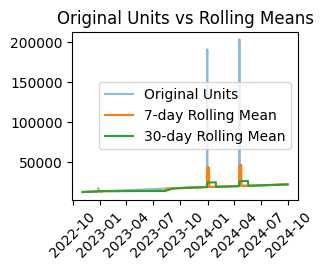

In [ ]:
plt.subplot(2, 2, 1)
plt.plot(df_cleaned['date'], df_cleaned['units'], label='Original Units', alpha=0.5)
plt.plot(df_cleaned['date'], df_cleaned['units_rolling_mean_7d'], label='7-day Rolling Mean')
plt.plot(df_cleaned['date'], df_cleaned['units_rolling_mean_30d'], label='30-day Rolling Mean')
plt.title('Original Units vs Rolling Means')
plt.legend()
plt.xticks(rotation=45)

(array([19266., 19358., 19448., 19539., 19631., 19723., 19814., 19905.,
        19997.]),
 [Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10')])

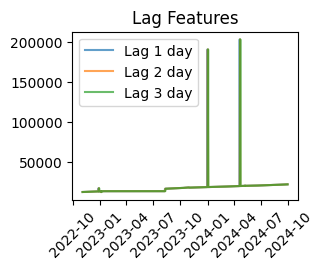

In [ ]:
plt.subplot(2, 2, 2)
for i in range(1, 4):
    plt.plot(df_cleaned['date'], df_cleaned[f'units_lag_{i}'],
             label=f'Lag {i} day', alpha=0.7)
plt.title('Lag Features')
plt.legend()
plt.xticks(rotation=45)

(array([19266., 19358., 19448., 19539., 19631., 19723., 19814., 19905.,
        19997.]),
 [Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10')])

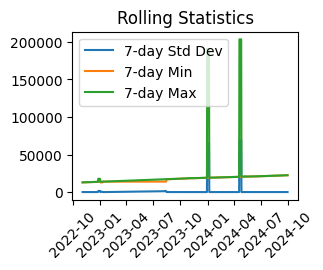

In [ ]:
plt.subplot(2, 2, 3)
plt.plot(df_cleaned['date'], df_cleaned['units_rolling_std_7d'], label='7-day Std Dev')
plt.plot(df_cleaned['date'], df_cleaned['units_rolling_min_7d'], label='7-day Min')
plt.plot(df_cleaned['date'], df_cleaned['units_rolling_max_7d'], label='7-day Max')
plt.title('Rolling Statistics')
plt.legend()
plt.xticks(rotation=45)

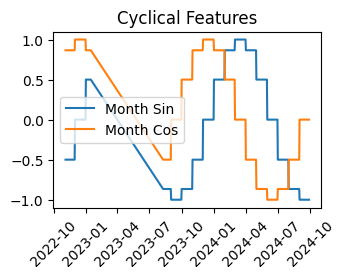

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(df_cleaned['date'], df_cleaned['month_sin'], label='Month Sin')
plt.plot(df_cleaned['date'], df_cleaned['month_cos'], label='Month Cos')
plt.title('Cyclical Features')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

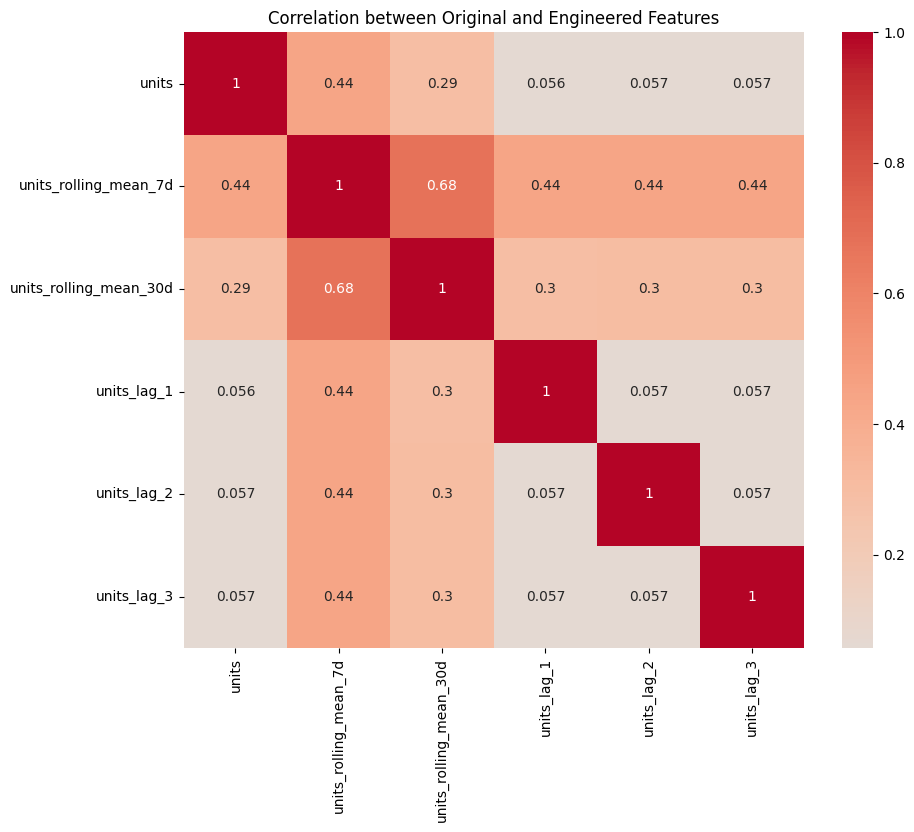

In [ ]:
correlation_matrix = df_cleaned[['units', 'units_rolling_mean_7d', 'units_rolling_mean_30d',
                                'units_lag_1', 'units_lag_2', 'units_lag_3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Original and Engineered Features')
plt.show()

In [ ]:
df['month_name'] = df['date'].dt.month_name()
df['day_name'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [ ]:
label_encoder = LabelEncoder()
df['month_encoded'] = label_encoder.fit_transform(df['month_name'])
df['day_encoded'] = label_encoder.fit_transform(df['day_name'])

In [ ]:
df_encoded = pd.get_dummies(df, columns=['month_name', 'day_name'], prefix=['month', 'day'])

In [ ]:
print("Original features:")
print(df.columns.tolist())
print("\
Features after encoding:")
print(df_encoded.columns.tolist())

Original features:
['date', 'units', 'KVAH', 'year', 'month', 'day', 'day_of_week', 'power_factor', 'units_cleaned', 'KVAH_cleaned', 'units_lag_1', 'KVAH_lag_1', 'units_lag_2', 'KVAH_lag_2', 'units_lag_3', 'KVAH_lag_3', 'units_rolling_mean_7d', 'units_rolling_mean_30d', 'KVAH_rolling_mean_7d', 'KVAH_rolling_mean_30d', 'units_rolling_std_7d', 'units_rolling_std_30d', 'KVAH_rolling_std_7d', 'KVAH_rolling_std_30d', 'units_rolling_min_7d', 'units_rolling_max_7d', 'KVAH_rolling_min_7d', 'KVAH_rolling_max_7d', 'units_pct_change', 'KVAH_pct_change', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_name', 'day_name', 'is_weekend', 'month_encoded', 'day_encoded']
Features after encoding:
['date', 'units', 'KVAH', 'year', 'month', 'day', 'day_of_week', 'power_factor', 'units_cleaned', 'KVAH_cleaned', 'units_lag_1', 'KVAH_lag_1', 'units_lag_2', 'KVAH_lag_2', 'units_lag_3', 'KVAH_lag_3', 'units_rolling_mean_7d', 'units_rolling_mean_30d', 'KVAH_rolling_me

In [ ]:
df_encoded.to_csv('encoded_features.csv', index=False)
print("\
Shape of final dataset:", df_encoded.shape)

Shape of final dataset: (519, 58)


In [ ]:
print("\
Sample of encoded data:")
print(df_encoded.head())

Sample of encoded data:
        date     units      KVAH  year  month  day  day_of_week  power_factor  \
0 2022-10-06  12583.57  12767.12  2022     10    6            3      0.985623   
1 2022-10-07  12590.03  12773.39  2022     10    7            4      0.985645   
2 2022-10-08  12597.36  12780.94  2022     10    8            5      0.985636   
3 2022-10-09  12605.07  12788.67  2022     10    9            6      0.985644   
4 2022-10-10  12612.53  12796.14  2022     10   10            0      0.985651   

   units_cleaned  KVAH_cleaned  ...  month_November  month_October  \
0       12583.57      12767.12  ...           False           True   
1       12590.03      12773.39  ...           False           True   
2       12597.36      12780.94  ...           False           True   
3       12605.07      12788.67  ...           False           True   
4       12612.53      12796.14  ...           False           True   

   month_September  day_Friday  day_Monday  day_Saturday  day_Sunday